In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [4]:
d = pd.read_csv("data/houses.csv")
d.head()

,area,value
0,57.02,202970
1,96.07,312626
2,93.18,264921
3,91.05,272091
4,69.76,209846


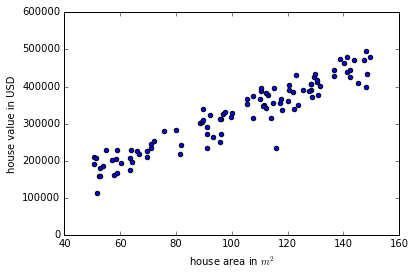

In [5]:
plt.scatter(d.area, d.value)
plt.xlabel("house area in $m^2$")
plt.ylabel("house value in USD")

**ASUMIMOS** que la relación entre el área ($y$) y el valor ($x_1$) es lineal, para la casa $i$:

$$y^{(i)} = \theta_0 + \theta_1 x_1^{(i)}$$

si establecemos que $x_0^{(i)}=1$ para todas las casas, entonces podemos escribir la expresión anterior de forma vectorial, con $\theta = [\theta_0, \theta_1]$ y $\mathbf{x}=[x_0, x_1]$

$$y^{(i)} = \theta\mathbf{x}^{(i)}$$

queremos encontrar los valores $\theta_{min}$ que parametrizan una recta de modo que

$$ J(\theta) =  \sum_{i=0}^{m-1} (\mathbf{x}\theta^{(i)}-y^{(i)})^2$$

$$\theta_{min} = \underset{\theta}{arg\,min} \,\,\,J(\theta)$$ 

en modo matricial

$$J(\theta) = sum(\mathbf{X}\theta-\mathbf{y})^2$$

P.ej., los parámetros $\theta_0=0$, $\theta_1=3800$ definen una recta que es mejorable respecto a los datos que tenemos. Observa como creamos las matrices $X$ e $y$, añadiendo una columna de unos a la matrix $X$

(100, 2) (100,)


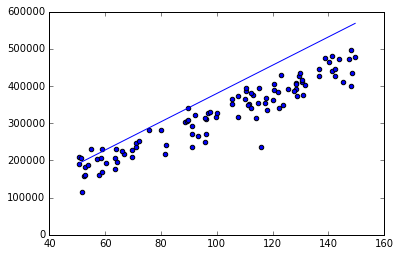

In [6]:
X = np.hstack((np.ones((len(d),1)), d[["area"]].as_matrix()))
y = d.value.as_matrix()
print X.shape, y.shape

t = np.array([0,3800])

xg = np.vstack((np.ones(100), np.linspace(np.min(d.area), np.max(d.area),100))).T
plt.scatter(d.area, d.value)
plt.plot(xg[:,1], xg.dot(t))

Una primera aproximación para obtener la recta con los parámetros $\theta_{min}$ según definido anteriormente es usando optimización _caja negra_. 

In [10]:
def cost(t):
    return np.sum((X.dot(t)-y)**2)

In [11]:
r = minimize(cost, [0,0], method="BFGS")
print r

      fun: 87173812745.69467
 hess_inv: array([[  6.22876043e-02,  -5.63995096e-04],
       [ -5.63995096e-04,   5.55252113e-06]])
      jac: array([    0., -2048.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 64
      nit: 5
     njev: 13
   status: 2
  success: False
        x: array([ 24743.21902937,   2937.2995932 ])


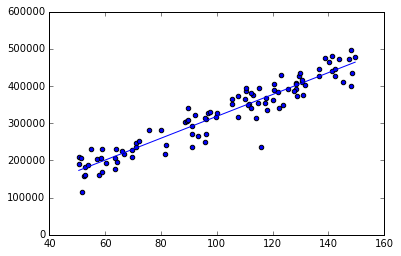

In [12]:
t = r.x
xg = np.vstack((np.ones(100), np.linspace(np.min(d.area), np.max(d.area),100))).T
plt.scatter(d.area, d.value)
plt.plot(xg[:,1], xg.dot(t))

El error de predicción medio que tenemos es de:

In [13]:
np.mean(np.abs(X.dot(t)-y))

22825.971498258597

El gradiente de $J$ es

$$\nabla J= 2X^{T}\cdot(X\cdot\theta-Y)$$

que podemos usar en los procesos de minimización

In [18]:
def grad(t):
    return 2*X.T.dot(X.dot(t)-y)

In [19]:
r = minimize(cost, [0,0], jac=grad, method="BFGS")
print r

      fun: 87173791346.97467
 hess_inv: array([[  6.23113465e-02,  -5.64148580e-04],
       [ -5.64148580e-04,   5.55323927e-06]])
      jac: array([ -9.89530236e-10,  -9.22009349e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([ 24794.85968752,   2936.83230103])
